# **PW4-Unsupervised machine learning: Kmeans, Hclustering, DBSCAN**

## Zhiqiang WANG


*Requirements for the work: the exercise 10 and exercise 11 should be uploaded on the DVL repository before the deadline. You should create your colab file correctly named.*

# **Learning outcomes PW4**
In this section, we will talk about three unsupervised machine learning algorithmes: Hierarchical Clustering, Kmeans and DBSCAN. We use the rand index metric to evaluate the performances for each algorithmes and compare them with the random clustering algorithm.

1. Part I: Generate the orignam data with label manually and define the metric function (rand index).

2. Part II: Clustering the orignal data by Hierarchical Clustering.

3. Part III: Clustering the orignal data by Kmeans.

4. Part IV: Clustering the orignal dayta by DBSCAN.


# **Part I: Generate the orignam data with label manually and define the metric function (rand index).**
Import tools.
Please import others if needed

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import cluster
import sklearn as sk
from sklearn import datasets
import pandas as pd

**Exercise 1: Generate a synthetic dataset**

1. Generate a set of 100 points in a 2 dimensional space split into 4 non overlapping clusters. You may need the function ***np.concatenate*** and the function ***np.random.rand()***

In [155]:
syn = np.empty([0, 2])
synLabels = []
for k in range(4):
    syn = np.concatenate((syn, k * 2 + np.random.rand(25, 2)), axis=0)
    synLabels = np.concatenate((synLabels, np.ones(25) * k))

In [156]:
syn
synLabels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

2. Display the set with one color per cluster using the scatter function from matplotlib.pyplot. Here, you may use ***plt.scatter(X, Y, color)***

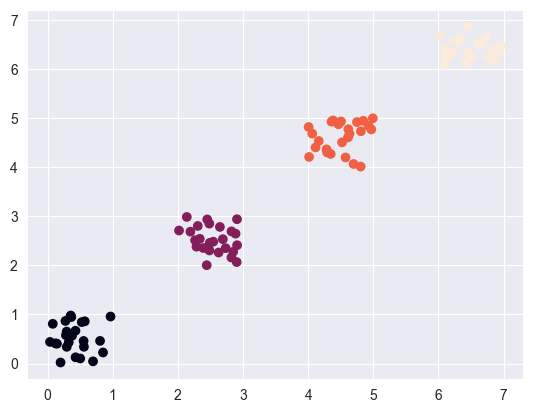

In [157]:
plt.scatter(syn[:, 0], syn[:, 1], c=synLabels);
plt.show();

3. Cluster this orignal data by the random clustering algorithm as the **Baseline**.

Cluster this dataset into k clusters by assigning a random integer value between 0 and k-1 to each point. You may need the function ***np.random.randint()***

In [158]:
def randomClustering(syn, k):
    return np.random.randint(0, k, syn.shape[0])

rand = randomClustering(syn, 4)

In [159]:
rand

array([1, 0, 2, 0, 3, 2, 2, 2, 2, 3, 0, 2, 3, 1, 3, 3, 3, 2, 2, 2, 2, 1,
       3, 2, 3, 0, 3, 1, 0, 2, 0, 1, 1, 2, 0, 3, 3, 1, 3, 2, 2, 0, 3, 2,
       1, 2, 3, 2, 0, 3, 0, 1, 3, 1, 2, 1, 1, 2, 1, 0, 2, 3, 0, 1, 1, 3,
       2, 2, 0, 1, 3, 0, 0, 3, 1, 3, 1, 0, 0, 3, 3, 2, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 2, 0, 0, 0, 2, 3, 1, 1])

**Exercise 2: Creat the rand index as the metric to evaluate the performance of clustering.**

The Rand index or Rand measure (named after William M. Rand) in statistics, and in particular in data clustering, is a measure of the similarity between two data clusterings. A form of the Rand index may be defined that is adjusted for the chance grouping of elements, this is the adjusted Rand index. The Rand index is the accuracy of determining if a link belongs within a cluster or not.

Given a set of n elements $S = { o_1 , … , o_n }$ and two partitions of S to compare, $X = { X_1 , … , X_r }$, a partition of S into r subsets, and $Y = {Y_ 1 , … , Y_s }$, a partition of S into s subsets, define the following:

    a, the number of pairs of elements in S that are in the same subset in X and in the same subset in Y;
    b, the number of pairs of elements in S that are in different subsets in X and in different subsets in Y;
    c, the number of pairs of elements in S that are in the same subset in X and in different subsets in Y;
    d, the number of pairs of elements in S that are in different subsets in X  and in the same subset in Y.

The Rand index, $R$, is:

   $ R = {{a + b}\over {a+b+c+d}}= {{a+b}\over C_n^2}={{a+b}\over n(n-1)/2}$

Intuitively, $a+b$ can be considered as the number of agreements between $X$ and $Y$ and $c + d$ as the number of disagreements between $X$ and $Y$.

Since the denominator is the total number of pairs, the Rand index represents the frequency of occurrence of agreements over the total pairs, or the probability that $X$ and $Y$ will agree on a randomly chosen pair.

Implement the rand index criterion (see https://en.wikipedia.org/wiki/Rand_index for reference)

In [160]:
def rand_index(ref, est):
    num = 0
    if len(ref) != len(est):
        print('arrays must be of the same size')
    for k in range(len(ref)):
        for l in range(len(ref)-k-1):
            if (ref[k]==ref[k+l+1] and est[k]==est[k+l+1]) or (ref[k]!=ref[k+l+1] and est[k]!=est[k+l+1]):
                num += 1
    den = len(ref)*(len(ref)-1)/2
    return num/den

Calculate the rand Index for random clustering (the ground truth is given at the first step as **synLabels**)

In [161]:
ri = rand_index(rand, rand)
print(ri)
ri = rand_index(synLabels, rand)
print(ri)

1.0
0.6408080808080808


Compute the rand index between the reference clustering and 100 runs of the baseline algorithm.

In [162]:
ri = np.zeros((100))
for k in range(100):
    ri[k] = rand_index(synLabels, randomClustering(syn, 4))

Display results and compute the mean and standard deviation.

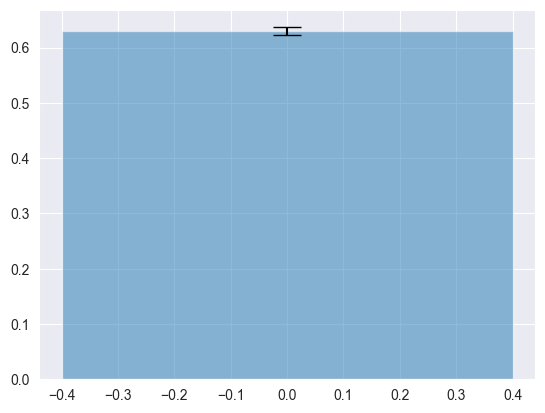

In [163]:
plt.bar(0, np.mean(ri), yerr = np.std(ri), alpha=0.5, ecolor='black', capsize=10)
plt.show()

# **Part II: Hierarchical Clustering**
**Exercise 3: Compute the euclidean distance matrix using the pdist function from *scipy.spatial.distance*.**

In [164]:
import scipy
from scipy.cluster.hierarchy import linkage
euc_distance_matrix = scipy.spatial.distance.pdist(syn)

Display and interpret its shape

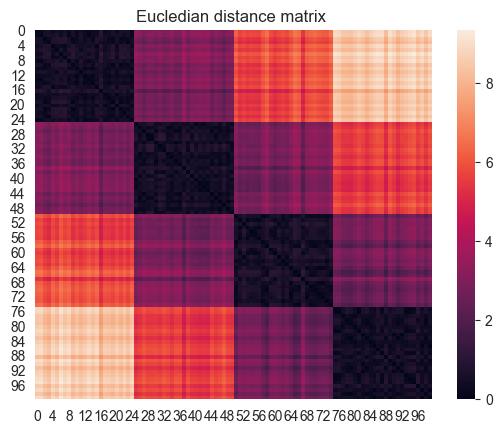

In [165]:
#We compute the squareform with scipy.spatial.distance.squareform
#and plot a heatmap through seaborn
import seaborn as sbn
squareform = scipy.spatial.distance.squareform(euc_distance_matrix)
plt.title("Eucledian distance matrix ")
sbn.heatmap(squareform)
plt.show()

answer here:
```
This euclidean distance matrix is a square matrix of size 100x100.
It shows the distance between each point of the dataset.
We can see that the distance between the points of the same cluster is smaller than the distance between the points of different clusters.

```

Compute the single link hierarchical clustering using the linkage function from ***scipy.cluster.hierarchy***.

In [166]:
l = sc.cluster.hierarchy.linkage(euc_distance_matrix)

**Exercise 4: Display the corresponding dendrogram using the dendrogram function from *scipy.cluster.hierarchy*.**

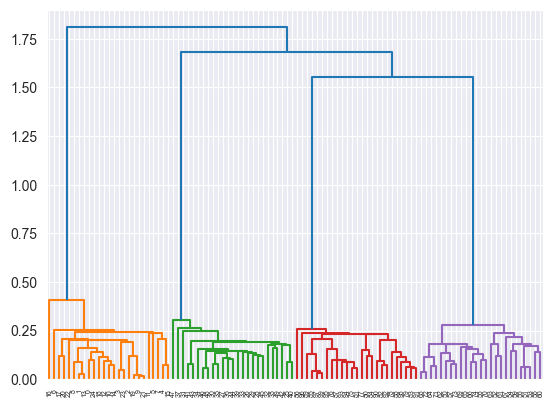

In [167]:
plt.figure()
dn = sc.cluster.hierarchy.dendrogram(l)

Implement a clustering algorithm that cuts the dendrogram in order to produce k clusters using the fcluster function from ***scipy.cluster.hierarchy***.

In [168]:
def agglomerativeClustering(x, k):
    d = sc.spatial.distance.pdist(x)
    l = sc.cluster.hierarchy.linkage(d)
    return sc.cluster.hierarchy.fcluster(l, k, criterion='maxclust')

agg = agglomerativeClustering(syn, 4)

**Exercise 5: Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.**

In [169]:
ri = np.zeros((100))
for k in range(100):
    ri[k] = rand_index(synLabels, agglomerativeClustering(syn, 4))

Display results and compute the mean and variance.

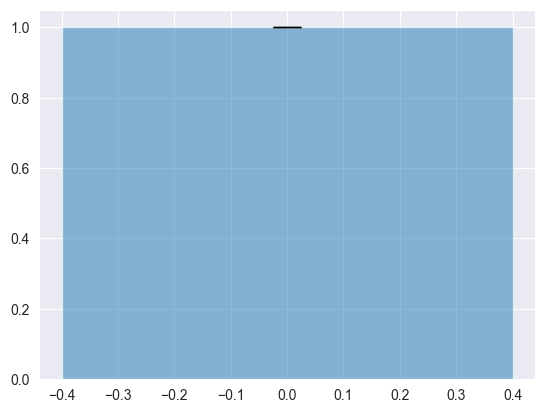

In [170]:
plt.bar(0, np.mean(ri), yerr = np.std(ri), alpha=0.5, ecolor='black', capsize=10)
plt.show()

Explain why the standard deviation is 0.

The algorithm is deterministic.

# **Part III: Partitional Clustering - Kmeans**

**Exercise6: Implement the k-means algorithm (see https://en.wikipedia.org/wiki/K-means_clustering section Standard algorithm for reference).**

Hint: please consider the cdist function from scipy.spatial.distance to compute the distance of the points to the centroids.

In [171]:
def kMeans(dataset, k, nbIterations=1000, show=False):

    centroids = np.random.random((k, dataset.shape[1]))*np.max(dataset)
    labels = np.zeros((dataset.shape[0]))
    for i in range(nbIterations):
        if show:
            plt.scatter(dataset[:, 0], dataset[:, 1], c=labels)
            plt.scatter(centroids[:, 0], centroids[:, 1], s=200)
            plt.show()

        cd = sc.spatial.distance.cdist(centroids, dataset)
        pastLabels = labels
        for d in range(dataset.shape[0]):
            labels[d] = np.argmin(cd[:, d])
        for c in range(k):
            centroids[c, :] = np.mean(dataset[labels==c, :], axis=0)

        if (np.all(pastLabels == labels)):
            break
    return labels

labels = kMeans(syn, 4)

C:\Users\alexs\PycharmProjects\MachineLearningS7\venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\alexs\PycharmProjects\MachineLearningS7\venv\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


**Exercise7: Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.**

In [172]:
ri = np.zeros((100))
for k in range(100):
    ri[k] = rand_index(synLabels, kMeans(syn, 4))

Display results and compute the mean and variance.

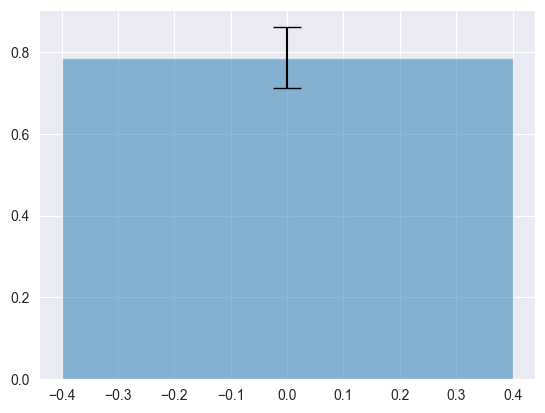

In [173]:
plt.bar(0, np.mean(ri), yerr = np.std(ri), alpha=0.5, ecolor='black', capsize=10)
plt.show()

# **Part IV: DBSCAN**
**Density-based spatial clustering of applications with noise (DBSCAN)** is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996. It is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN have two parameters important: eps and min_sample. Unlike Kmeans, we don't have to specify the number of clusters before clustering.

**Exercise8: Clustering the data syn by DBSCAN.**

Here, you can use directily *sklearn.cluster.DBSCAN(eps=0.5, min_samples=5, metric='euclidean')*

In [174]:
from sklearn.cluster import DBSCAN
clustering_DBSCAN = DBSCAN(eps=0.5, min_samples=5).fit(syn)

After clustering, give us the labels for each observation.

In [175]:
clustering_DBSCAN.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

Compute the rand index between the reference clustering and 100 runs of this DBSCAN clustering algorithm.

In [176]:
ri = np.zeros((100))
for k in range(100):
    clustering_DBSCAN = DBSCAN(eps=0.5, min_samples=5).fit(syn)
    ri[k] = rand_index(synLabels, clustering_DBSCAN.labels_)

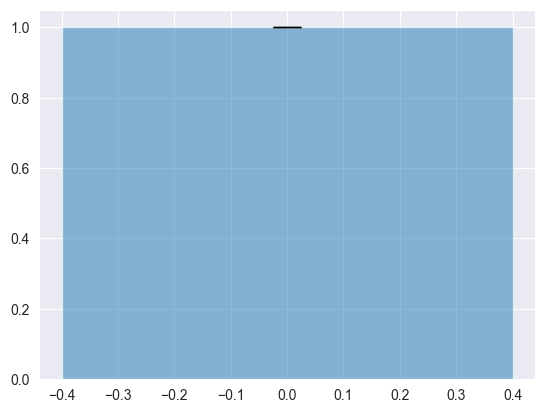

In [177]:
plt.bar(0, np.mean(ri), yerr = np.std(ri), alpha=0.5, ecolor='black', capsize=10)
plt.show()

**Exercise9: Performance Analysis**

Display the performance of the 4 clustering algorithms (Random, Hierarchical Clustering, Kmeans and DBSCAN) on the synthetic dataset using the bar function from matplotlib.pyplot.

C:\Users\alexs\PycharmProjects\MachineLearningS7\venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\alexs\PycharmProjects\MachineLearningS7\venv\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\alexs\PycharmProjects\MachineLearningS7\venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\alexs\PycharmProjects\MachineLearningS7\venv\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\alexs\PycharmProjects\MachineLearningS7\venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\alexs\PycharmProjects\MachineLearningS7\venv\Lib\site-packages\

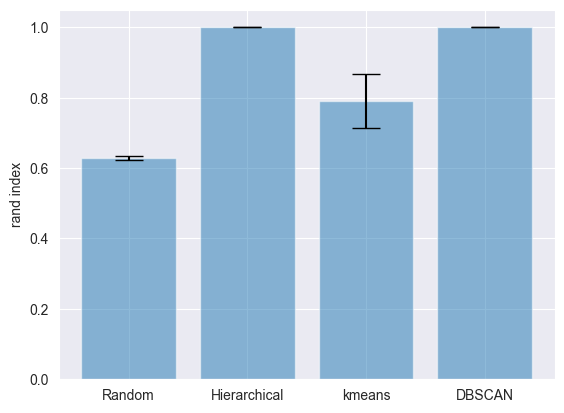

In [178]:
ri = np.zeros((4, 100))
for k in range(100):
    ri[0, k] = rand_index(synLabels, randomClustering(syn, 4))
    ri[1, k] = rand_index(synLabels, agglomerativeClustering(syn, 4))
    ri[2, k] = rand_index(synLabels, kMeans(syn, 4))
    ri[3, k] = rand_index(synLabels, DBSCAN(eps=0.5, min_samples=5).fit(syn).labels_)

x = [0, 1, 2, 3]
plt.bar(x, np.mean(ri, axis=1), yerr = np.std(ri, axis=1), alpha=0.5, ecolor='black', capsize=10)
plt.ylabel('rand index')
plt.xticks(x, ['Random', 'Hierarchical', 'kmeans', 'DBSCAN'])
plt.show()

**Exercise10: Load the iris dataset using the *sklearn.datasets.load_iris* function from scikit-learn and perform the same performance analysis using this dataset.**

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray. This dataset have reference label in the *'target'* column. The 3 features are included inside the *'data'*.

The rows being the samples and the columns being: *Sepal Length, Sepal Width, Petal Length and Petal Width.*

```
ANSWER HERE
//////////////////////
//////////////////////
//////////////////////
//////////////////////
//////////////////////
```

In [179]:
from sklearn.datasets import load_iris
dataIris = load_iris()
print(dataIris)
print(dataIris.data)
print(dataIris.target)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

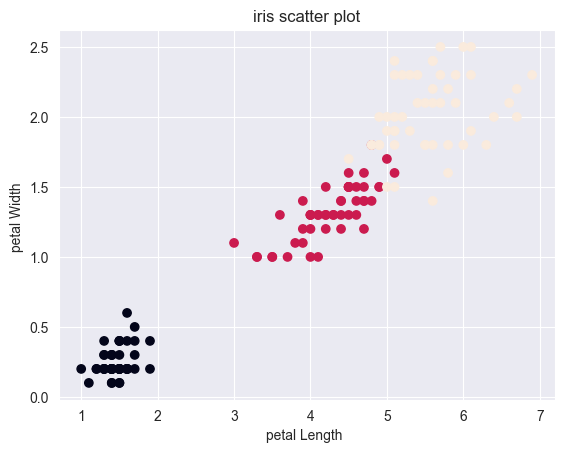

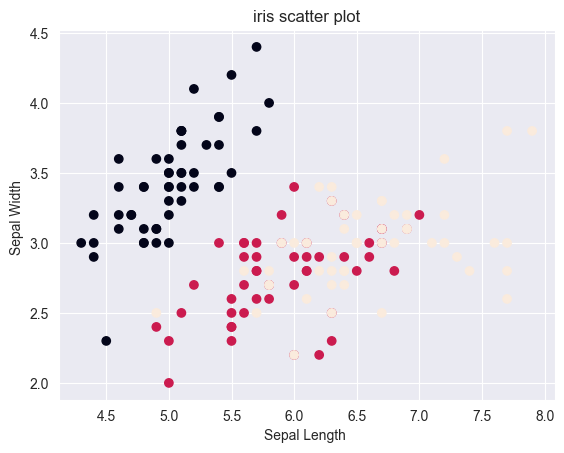

In [180]:
# Extract data
sepal_length = dataIris.data[:, 0]
sepal_width = dataIris.data[:, 1]  
petal_length = dataIris.data[:,2]
petal_width = dataIris.data[:,3]

# Plot data for visualization
plt.scatter(petal_length, petal_width, c= dataIris.target)
plt.xlabel('petal Length ')
plt.ylabel('petal Width ')
plt.title('iris scatter plot')
plt.show()

plt.scatter(sepal_length, sepal_width, c=dataIris.target)
plt.xlabel('Sepal Length ')
plt.ylabel('Sepal Width ')
plt.title('iris scatter plot')
plt.show()


C:\Users\alexs\PycharmProjects\MachineLearningS7\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


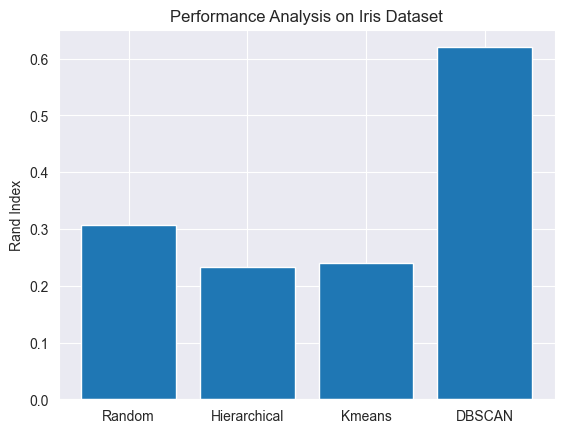

In [181]:
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
 
# Random clustering
random_labels = np.random.randint(0, 3, len(dataIris.target))

# Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3).fit(dataIris.data)
agg_labels = agg_cluster.labels_

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(dataIris.data)
kmeans_labels = kmeans.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(dataIris.data)
dbscan_labels = dbscan.labels_

# Evaluate rand index for each algorithm
rand_index_random = accuracy_score(dataIris.target, random_labels)
rand_index_agg = accuracy_score(dataIris.target, agg_labels)
rand_index_kmeans = accuracy_score(dataIris.target, kmeans_labels)
rand_index_dbscan = accuracy_score(dataIris.target, dbscan_labels)

methods = ['Random', 'Hierarchical', 'Kmeans', 'DBSCAN']
rand_indices = [rand_index_random, rand_index_agg, rand_index_kmeans, rand_index_dbscan]

plt.bar(methods, rand_indices)
plt.ylabel('Rand Index')
plt.title('Performance Analysis on Iris Dataset')
plt.show()

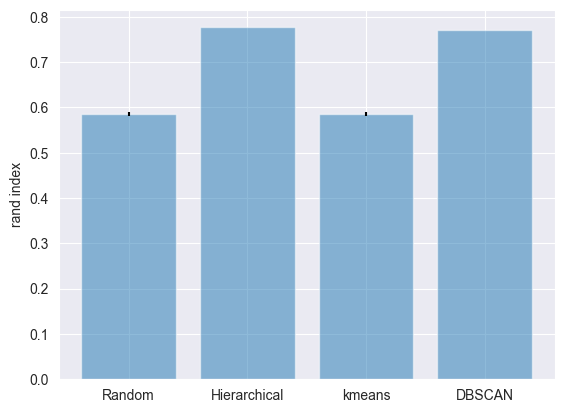

In [182]:
x = [0, 1, 2, 3]
randomIndexArray = np.zeros((4, 100))
for i in range(100):
    randomIndexArray[0, i] = rand_index(dataIris.target, randomClustering(dataIris.data, 4))
    randomIndexArray[1, i] = rand_index(dataIris.target, agglomerativeClustering(dataIris.data, 4))
    randomIndexArray[2, i] = rand_index(dataIris.target, randomClustering(dataIris.data, 4))
    randomIndexArray[3, i] = rand_index(dataIris.target, DBSCAN(eps=0.5, min_samples=5).fit(dataIris.data).labels_)
                          
plt.bar(x, np.mean(randomIndexArray, axis=1), yerr = np.std(randomIndexArray, axis=1), alpha=0.5, ecolor='black')
plt.ylabel('rand index')
plt.xticks(x, ['Random', 'Hierarchical', 'kmeans', 'DBSCAN'])
plt.show()

**# Exercise11: Load the Breast cancer wisconsin (diagnostic) dataset**

Use the sklearn.datasets.load_breast_cancer function from scikit-learn and perform the same performance analysis using this dataset.

The breast cancer dataset is a classic and very easy binary classification dataset. The featuers are stored in 'data'. And the reference are stored in the 'target' .

```
ANSWER HERE
//////////////////////
//////////////////////
//////////////////////
//////////////////////
//////////////////////
```

In [183]:
from sklearn.datasets import load_breast_cancer
dataCancer = load_breast_cancer()
dataCancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

C:\Users\alexs\PycharmProjects\MachineLearningS7\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


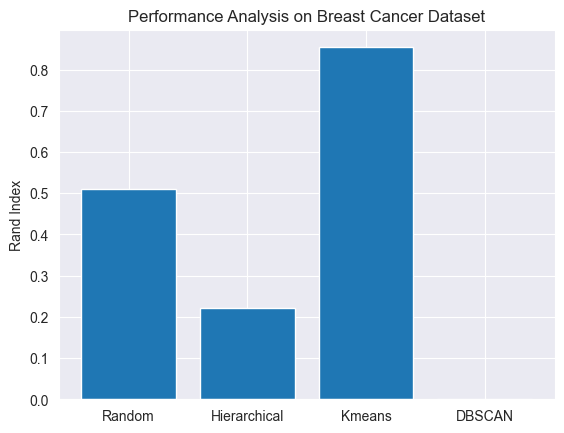

In [184]:
# Random clustering as baseline
random_labels_cancer = np.random.randint(0, 2, len(dataCancer.target))

# Hierarchical Clustering
agg_cluster_cancer = AgglomerativeClustering(n_clusters=2).fit(dataCancer.data)
agg_labels_cancer = agg_cluster_cancer.labels_

# KMeans
kmeans_cancer = KMeans(n_clusters=2, random_state=42).fit(dataCancer.data)
kmeans_labels_cancer = kmeans_cancer.labels_

# DBSCAN
dbscan_cancer = DBSCAN(eps=2, min_samples=5).fit(dataCancer.data)
dbscan_labels_cancer = dbscan_cancer.labels_

# Evaluate Rand index for each algorithm
rand_index_random_cancer = accuracy_score(dataCancer.target, random_labels_cancer)
rand_index_agg_cancer = accuracy_score(dataCancer.target, agg_labels_cancer)
rand_index_kmeans_cancer = accuracy_score(dataCancer.target, kmeans_labels_cancer)
rand_index_dbscan_cancer = accuracy_score(dataCancer.target, dbscan_labels_cancer)

# Display results
methods_cancer = ['Random', 'Hierarchical', 'Kmeans', 'DBSCAN']
rand_indices_cancer = [rand_index_random_cancer, rand_index_agg_cancer, rand_index_kmeans_cancer, rand_index_dbscan_cancer]

plt.bar(methods_cancer, rand_indices_cancer)
plt.ylabel('Rand Index')
plt.title('Performance Analysis on Breast Cancer Dataset')
plt.show()

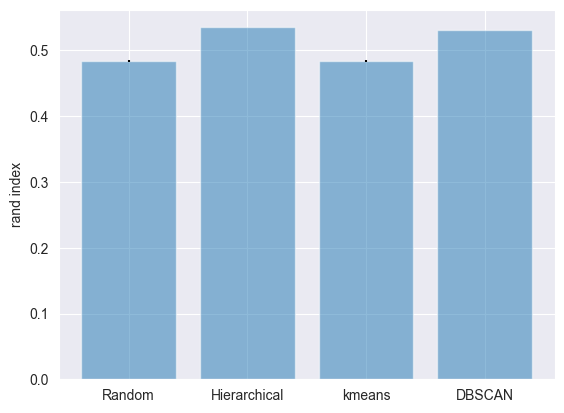

In [185]:
x = [0, 1, 2, 3]
randomIndexArray = np.zeros((4, 100))
for i in range(100):
    randomIndexArray[0, i] = rand_index(dataCancer.target, randomClustering(dataCancer.data, 4))
    randomIndexArray[1, i] = rand_index(dataCancer.target, agglomerativeClustering(dataCancer.data, 4))
    randomIndexArray[2, i] = rand_index(dataCancer.target, randomClustering(dataCancer.data, 4))
    randomIndexArray[3, i] = rand_index(dataCancer.target, DBSCAN(eps=0.5, min_samples=5).fit(dataCancer.data).labels_)
                          
plt.bar(x, np.mean(randomIndexArray, axis=1), yerr = np.std(randomIndexArray, axis=1), alpha=0.5, ecolor='black')
plt.ylabel('rand index')
plt.xticks(x, ['Random', 'Hierarchical', 'kmeans', 'DBSCAN'])
plt.show()

**Exercise12: Determining the number of clusters for KMeans**

Implement the gap statistic method for determining the optimal number of clusters for the 3 datasets. Gap statistics compares the change in within-cluster dispersion with the uniform distribution. A large gap statistics value means that the clustering is very different from the uniform distribution.

In [186]:
#We use K-means from scikit-learn in this method.
#The code is taken from the article: https://grabngoinfo.com/5-ways-for-deciding-number-of-clusters-in-a-clustering-model/

from sklearn.cluster import KMeans
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie

    Parameters
    ----------
    data:
        ndarry of shape (n_samples, n_features)
    nrefs:
        number of sample reference datasets to create
    maxClusters:
        Maximum number of clusters to test for

    Returns
    -------
    (gaps, optimalK): tuple
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):

            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)

            # Fit to it
            km = KMeans(k, n_init=10)
            km.fit(randomReference)

            refDisp = km.inertia_
            refDisps[i] = refDisp
        # Fit cluster to original data and create dispersion
        km = KMeans(k,n_init=10)
        km.fit(data)

        origDisp = km.inertia_
        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap

        resultsdf = resultsdf._append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

Optimal k is:  4


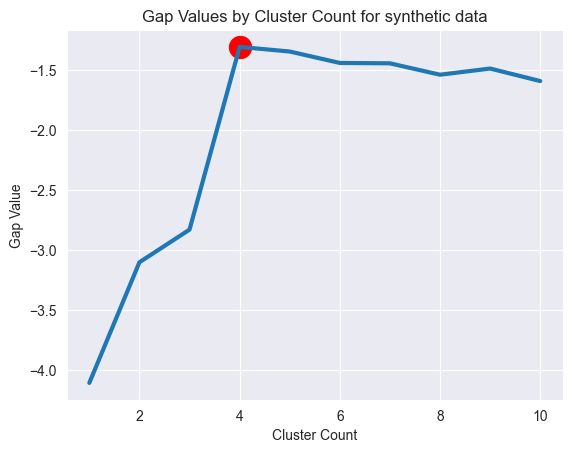

In [187]:
# We calculate the three gap-statistics and print for the baseline algorithm:
k, gapdf = optimalK(syn, nrefs=3, maxClusters=11)
print('Optimal k is: ', k)
# Visualization
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count for synthetic data')
plt.show()

Optimal k is:  8


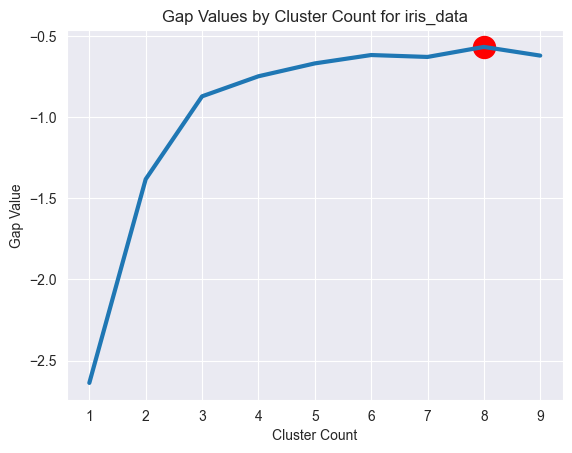

In [188]:
#We repeat the analysis for the iris data.
dataset = sk.datasets.load_iris()
iris_data = dataset['data']
k, gapdf = optimalK(iris_data, nrefs=3, maxClusters=10)
print('Optimal k is: ', k)
# Visualization
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count for iris_data')
plt.show()

Optimal k is:  10


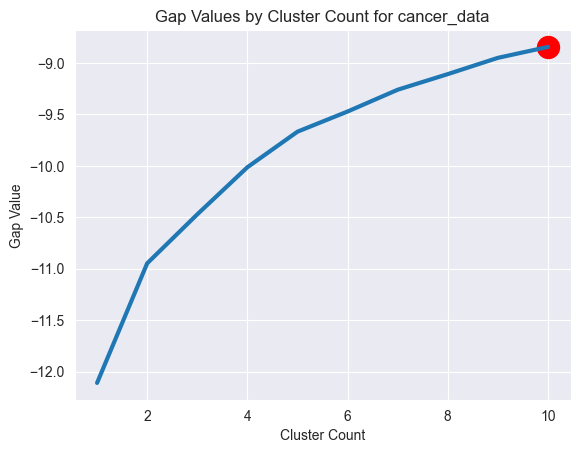

In [189]:
#We repeat the analysis for the cancer data.
dataset = sk.datasets.load_breast_cancer()
cancer_data = dataset['data']
k, gapdf = optimalK(cancer_data, nrefs=3, maxClusters=11)
print('Optimal k is: ', k)
# Visualization
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count for cancer_data')
plt.show()